<a href="https://colab.research.google.com/github/aryansh007/MachineLearning/blob/main/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.svm import LinearSVC

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2       0
1                  4.9               3.0  ...               0.2       0
2                  4.7               3.2  ...               0.2       0
3                  4.6               3.1  ...               0.2       0
4                  5.0               3.6  ...               0.2       0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3       2
146                6.3               2.5  ...               1.9       2
147                6.5               3.0  ...               2.0       2
148                6.2               3.4  ...               2.3       2
149                5.9               3.0  ...               1.8       2

[150 rows x 5 columns]


In [ ]:
X=df.iloc[50:,2:-1].to_numpy()
y=df.iloc[50:,-1].to_numpy()
Y = (y == 2).astype(int)

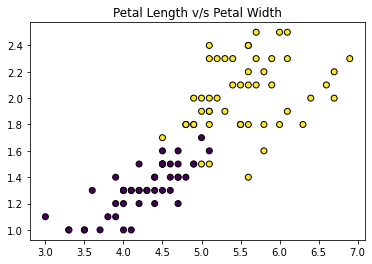

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k')
plt.title("Petal Length v/s Petal Width")
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)
svm = LinearSVC().fit(X_train,Y_train)
print('Accuracy training data :', svm.score(X_train, Y_train)*100,"%")
print('Accuracy test data :', svm.score(X_test, Y_test)*100,"%")

Accuracy training data : 92.5 %
Accuracy test data : 95.0 %


In [ ]:
arr = np.arange(0,100)
np.random.shuffle(arr)
idx_split = np.split(arr,5)

class0_acc = []
class1_acc = []

for k in range(5):
  train_idx = []
  test_idx = []

  for j in range(5):
    if j != k:
      train_idx.extend(idx_split[j])
  test_idx.extend(idx_split[k])

  X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], Y[train_idx], Y[test_idx]

  svm = LinearSVC(C=50, max_iter=100000)
  svm.fit(X_train, y_train)
  class0_acc.append(svm.score(X[:50],Y[:50]))
  class1_acc.append(svm.score(X[50:],Y[50:]))

In [ ]:
Accuracy = pd.DataFrame({'Versicolor':class0_acc,'Virginica':class1_acc})

print(Accuracy)
print()
print("Average accuracy, Versicolor:",np.mean(class0_acc))
print("Average accuracy, Virginica:",np.mean(class1_acc))

   Versicolor  Virginica
0        0.94       0.96
1        0.94       0.94
2        0.94       0.94
3        0.94       0.94
4        0.94       0.94

Average accuracy, Versicolor: 0.9399999999999998
Average accuracy, Virginica: 0.944


In [ ]:
X=df.iloc[:,:-1].to_numpy()
y=df.iloc[:,-1].to_numpy()

In [ ]:
def k_means(X,K,n_iter):

  centroids = []
  m=X.shape[0]
  n=X.shape[1]
  for k in range(K):
    centroids.append(X[random.randint(0,m-1)])
  for i in range(n_iter):
    euclid = []
    cent = {}
    for k in range(K):
      dist = np.sqrt(np.sum((X-centroids[k])**2,axis=1))
      euclid.append(dist)
    minimum = np.argmin(euclid,axis=0)
    for k in range(m):
      if minimum[k] not in cent:
        cent[minimum[k]] = []
      cent[minimum[k]].append(X[k])
    for k in cent:
      centroids[k] = np.mean(cent[k],axis=0)
  return np.array(centroids), [np.std(cent[z]) for z in range(K)], minimum

In [ ]:
def get_distance(x1, x2):
  sum = 0
  for i in range(len(x1)):
      sum += (x1[i] - x2[i]) ** 2
  return np.sqrt(sum)

def list_accuracy(y_p, y_a):
  diff = y_p - y_a
  return len(np.where(diff == 0)[0]) / len(diff)

def data_accuracy(X_,y_,w_,cent,stddev):
  RBF_list_tst = rbf_list(X_, cent, stddev)
  pred_ty = np.dot(RBF_list_tst, w_)
  pred_ty = np.array([np.argmax(x) for x in pred_ty])
  return list_accuracy(pred_ty,y_)

def convert_y(x, num_of_classes):
  arr = np.zeros((len(x), num_of_classes))
  for i in range(len(x)):
      c = int(x[i])
      arr[i][c] = 1
  return arr

def rbf(x, c, s):
  distance = get_distance(x, c)
  return np.exp(- distance**2 / 2*(s ** 2))

def rbf_list(X, centroids, std_list):
  RBF_list = []
  for x in X:
      RBF_list.append([rbf(x, c, s) for (c, s) in zip(centroids, std_list)])
  return np.array(RBF_list)

def rbf_fit(X_train, y_train, X_test, y_test, number_of_classes, k):
  centroids, std_list, y_pred = k_means(X_train, k, 1000)
  RBF_X = rbf_list(X_train, centroids, std_list)
  w = np.dot(np.dot(np.linalg.pinv(np.dot(RBF_X.T,RBF_X)), RBF_X.T), convert_y(y_train, number_of_classes))
  return w, centroids, std_list

In [ ]:
x1, x2, y1, y2 = train_test_split(X, y, test_size =0.2, shuffle=True)
w, centroids, std_list = rbf_fit(x1, y1, x2, y2, 3, 3)

for cls in range(3):
  print('Class Accuracy for Class',cls,':',data_accuracy(X[y==cls], y[y==cls], w, centroids, std_list))

Class Accuracy for Class 0 : 1.0
Class Accuracy for Class 1 : 0.96
Class Accuracy for Class 2 : 0.72


In [ ]:
rbf_cls_acc = [[] for i in range(3)]

for itr in range(10):
  x1, x2, y1, y2 = train_test_split(X, y, test_size =0.2, shuffle=True)
  w, centroids, std_list = rbf_fit(x1, y1, x2, y2, 3, 3)
  for cls in range(3):
    rbf_cls_acc[cls].append(data_accuracy(X[y==cls], y[y==cls], w, centroids, std_list))

for cls in range(3):
  print('Average Accuracy for Class',cls,":",np.mean(rbf_cls_acc[cls]))

Average Accuracy for Class 0 : 1.0
Average Accuracy for Class 1 : 0.86
Average Accuracy for Class 2 : 0.6719999999999999


In [ ]:
print('\nOverall Accuracy: ', data_accuracy(X, y, w, centroids, std_list))


Overall Accuracy:  0.8933333333333333
